# The Need for Gradient Descent

So far, we've learned how to solve optimization problems by taking the derivative, setting it to zero, and solving for `x` analytically. However, this method can get very complicated, very fast.

Consider the function:
$$ f(x) = e^x - \ln(x) $$

To find its minimum, we would need to solve the equation $f'(x) = 0$:
$$ e^x - \frac{1}{x} = 0 \implies e^x = \frac{1}{x} $$

Solving this equation for `x` is extremely difficult to do by hand. This is a common problem in machine learning, where our cost functions are often too complex to solve analytically.

This motivates the need for an **iterative** method that can find the minimum of a function in a step-by-step way, even if we can't solve for it directly. This method is called **Gradient Descent**. Let's start with a simple, intuitive version of this iterative approach.

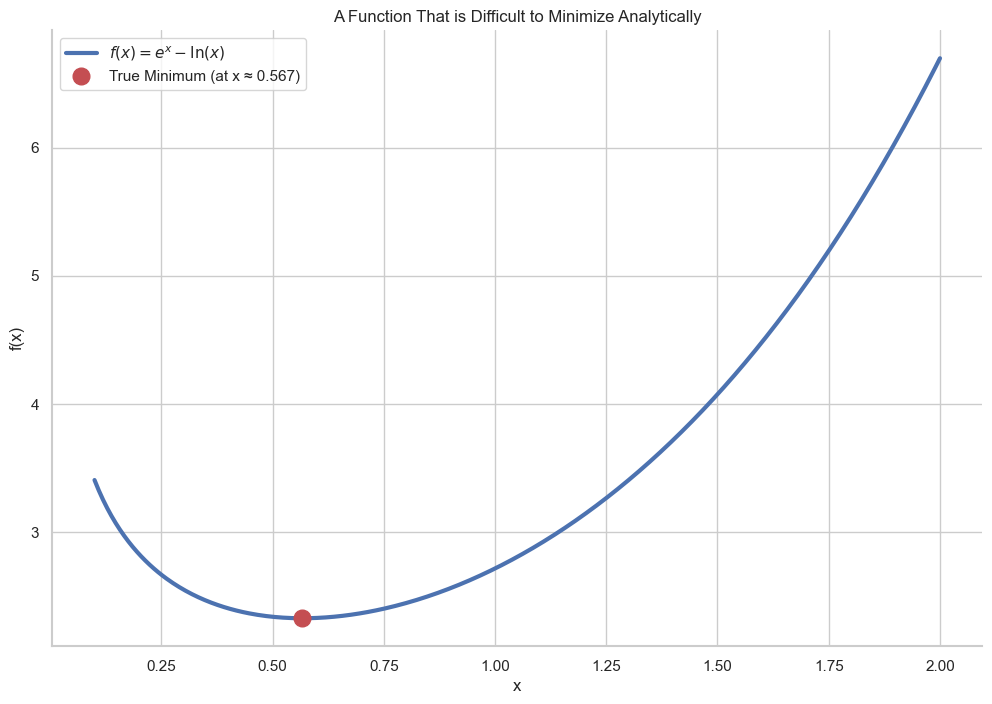

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define the function ---
def f(x):
    return np.exp(x) - np.log(x)

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 8))

x_vals = np.linspace(0.1, 2, 400)
y_vals = f(x_vals)

ax.plot(x_vals, y_vals, 'b-', linewidth=3, label='$f(x) = e^x - \\ln(x)$')

# --- Highlight the true minimum ---
# The minimum is at the omega constant, approx 0.567
min_x = 0.567
min_y = f(min_x)
ax.plot(min_x, min_y, 'ro', markersize=12, label=f'True Minimum (at x ≈ {min_x:.3f})')

# --- Format the plot ---
ax.set_title('A Function That is Difficult to Minimize Analytically')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)

ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

---

## A Simple Iterative Approach

Since we can't solve for the minimum directly, let's try to find it with a simple "guess and check" method.

1.  **Start** at a random point on the curve.
2.  **Explore:** Take a small step to the left and a small step to the right.
3.  **Decide:** Check the function's value at both new points. Move to the point that has the lower value (since we're minimizing).
4.  **Repeat:** Continue this process from the new point.

Eventually, we will reach a point where taking a step in either direction results in a *higher* value. At this stage, we can conclude that we are at (or very close to) a local minimum and stop.

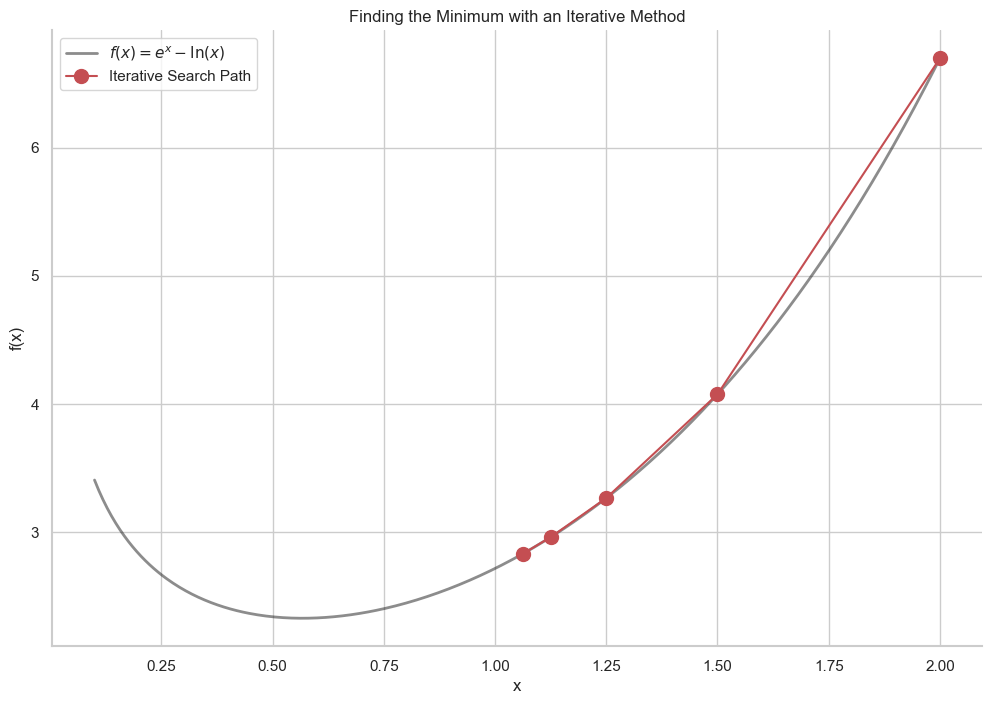

In [2]:
# --- Visualize the iterative search ---
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the function
ax.plot(x_vals, y_vals, 'k-', linewidth=2, alpha=0.5, label='$f(x) = e^x - \\ln(x)$')

# --- The iterative process ---
current_x = 2.0
step_size = 0.5
path_x = [current_x]
path_y = [f(current_x)]

for i in range(4):
    left_x = current_x - step_size
    right_x = current_x + step_size
    
    left_y = f(left_x)
    right_y = f(right_x)
    
    # Decide which way to go
    if left_y < f(current_x) and left_y < right_y:
        current_x = left_x
    elif right_y < f(current_x) and right_y < left_y:
        current_x = right_x
    else:
        # If neither direction is better, stop
        break
        
    path_x.append(current_x)
    path_y.append(f(current_x))
    step_size /= 2 # Make the steps smaller as we get closer

# Plot the path
ax.plot(path_x, path_y, 'ro-', markersize=10, label='Iterative Search Path')
    
# --- Format the plot ---
ax.set_title('Finding the Minimum with an Iterative Method')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)

ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

This method is not bad, but it's inefficient. We have to check two directions at every step. There is a much more powerful way to know the best direction to move in, which we will explore in the next lesson.